<a href="https://colab.research.google.com/github/SSATHVIKA/FIFA-World-Cup-Prediction-2026/blob/main/FIFA_World_Cup_Prediction_2026.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importing the drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Importing the required libraries

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
%matplotlib inline

Loading the data set

In [ ]:
data_set = pd.read_csv('/content/drive/MyDrive/international_matches.csv')

In [ ]:
data_set.head(4)

,date,home_team,away_team,home_team_continent,away_team_continent,home_team_fifa_rank,away_team_fifa_rank,home_team_total_fifa_points,away_team_total_fifa_points,home_team_score,...,shoot_out,home_team_result,home_team_goalkeeper_score,away_team_goalkeeper_score,home_team_mean_defense_score,home_team_mean_offense_score,home_team_mean_midfield_score,away_team_mean_defense_score,away_team_mean_offense_score,away_team_mean_midfield_score
0,1993-08-08,Bolivia,Uruguay,South America,South America,59,22,0,0,3,...,No,Win,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1993-08-08,Brazil,Mexico,South America,North America,8,14,0,0,1,...,No,Draw,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1993-08-08,Ecuador,Venezuela,South America,South America,35,94,0,0,5,...,No,Win,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1993-08-08,Guinea,Sierra Leone,Africa,Africa,65,86,0,0,1,...,No,Win,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Exploratory Data Analysis (EDA)

In [ ]:
data_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23921 entries, 0 to 23920
Data columns (total 25 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   date                           23921 non-null  object 
 1   home_team                      23921 non-null  object 
 2   away_team                      23921 non-null  object 
 3   home_team_continent            23921 non-null  object 
 4   away_team_continent            23921 non-null  object 
 5   home_team_fifa_rank            23921 non-null  int64  
 6   away_team_fifa_rank            23921 non-null  int64  
 7   home_team_total_fifa_points    23921 non-null  int64  
 8   away_team_total_fifa_points    23921 non-null  int64  
 9   home_team_score                23921 non-null  int64  
 10  away_team_score                23921 non-null  int64  
 11  tournament                     23921 non-null  object 
 12  city                           23921 non-null 

In [ ]:
ls = list(data_set.columns)
print(ls)

['date', 'home_team', 'away_team', 'home_team_continent', 'away_team_continent', 'home_team_fifa_rank', 'away_team_fifa_rank', 'home_team_total_fifa_points', 'away_team_total_fifa_points', 'home_team_score', 'away_team_score', 'tournament', 'city', 'country', 'neutral_location', 'shoot_out', 'home_team_result', 'home_team_goalkeeper_score', 'away_team_goalkeeper_score', 'home_team_mean_defense_score', 'home_team_mean_offense_score', 'home_team_mean_midfield_score', 'away_team_mean_defense_score', 'away_team_mean_offense_score', 'away_team_mean_midfield_score', 'year', 'month']


In [ ]:
print(data_set['home_team_goalkeeper_score'].mean())
print(data_set['away_team_goalkeeper_score'].mean())
print(data_set['home_team_mean_defense_score'].mean())
print(data_set['home_team_mean_offense_score'].mean())
print(data_set['home_team_mean_midfield_score'].mean())
print(data_set['away_team_mean_defense_score'].mean())
print(data_set['away_team_mean_offense_score'].mean())
print(data_set['away_team_mean_midfield_score'].mean())

74.96383816684569
74.21247683755405
74.90324900475152
75.81874265569918
75.88929184023524
74.42437863564251
75.42001924927814
75.25914274971801


In [ ]:
null_cols = ['home_team_goalkeeper_score', 'away_team_goalkeeper_score', 'home_team_mean_defense_score', 'home_team_mean_offense_score', 'home_team_mean_midfield_score',
             'away_team_mean_defense_score', 'away_team_mean_offense_score', 'away_team_mean_midfield_score']

In [ ]:
for x in null_cols:
  data_set[x] = data_set[x].fillna(data_set[x].mean())

In [ ]:
data_set.isnull().sum()

date                             0
home_team                        0
away_team                        0
home_team_continent              0
away_team_continent              0
home_team_fifa_rank              0
away_team_fifa_rank              0
home_team_total_fifa_points      0
away_team_total_fifa_points      0
home_team_score                  0
away_team_score                  0
tournament                       0
city                             0
country                          0
neutral_location                 0
shoot_out                        0
home_team_result                 0
home_team_goalkeeper_score       0
away_team_goalkeeper_score       0
home_team_mean_defense_score     0
home_team_mean_offense_score     0
home_team_mean_midfield_score    0
away_team_mean_defense_score     0
away_team_mean_offense_score     0
away_team_mean_midfield_score    0
dtype: int64

In [ ]:
data_set["date"] = pd.to_datetime(data_set["date"])
data_set['year'] = data_set['date'].dt.year
data_set['month'] = data_set['date'].dt.month

In [ ]:
data_set_yr = data_set.groupby("year").agg({'date':'count', 'home_team_score':'mean', 'away_team_score':'mean'})
data_set_yr.columns = ["matches", "home_goals", "away_goals"]

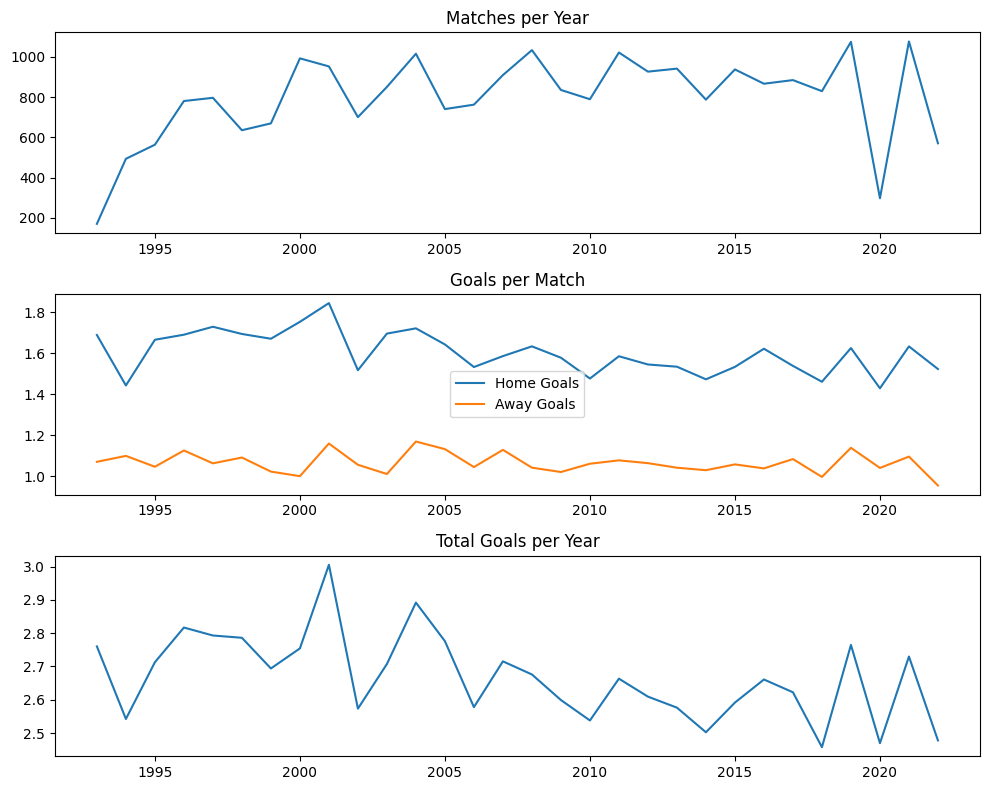

In [ ]:
fig, axs = plt.subplots(3, 1, figsize=(10, 8))
axs[0].plot(data_set_yr['matches'])
axs[0].set_title('Matches per Year')
axs[1].plot(data_set_yr['home_goals'], label='Home Goals')
axs[1].plot(data_set_yr['away_goals'], label='Away Goals')
axs[1].legend()
axs[1].set_title('Goals per Match')
axs[2].plot(data_set_yr['home_goals'] + data_set_yr['away_goals'])
axs[2].set_title('Total Goals per Year')
plt.tight_layout()
plt.show()

Heat map

<ipython-input-13-affa1bbfa74b>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data_set.corr(), cmap='crest', annot=True)


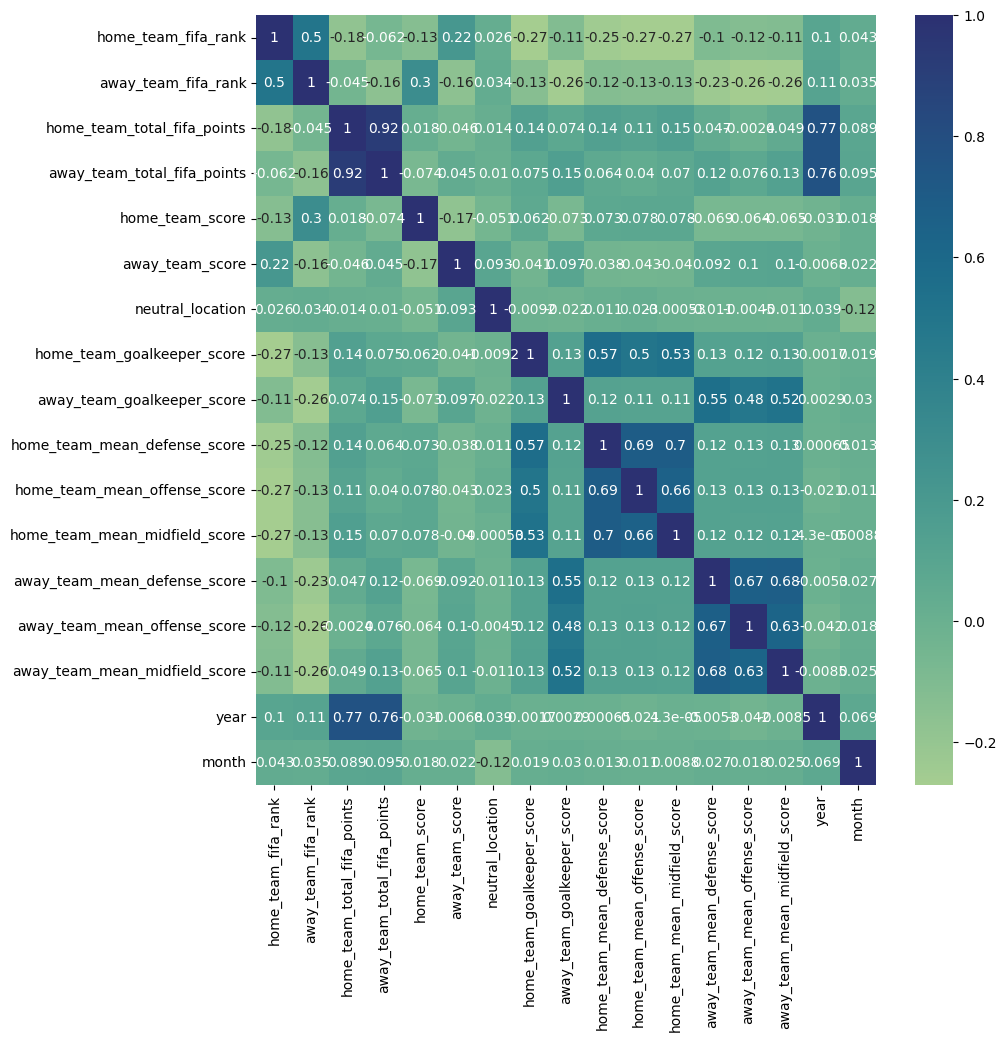

In [ ]:
plt.figure(figsize=(10, 10))
sns.heatmap(data_set.corr(), cmap='crest', annot=True)
plt.show()

Creating a new dataframe which includes the teams which plays only FIFA World Cup

In [ ]:
wrld_cup_data = data_set[data_set["tournament"] == "FIFA World Cup"]

Creating another dataframe which includes the columns home team, away team and the result of the games played

In [ ]:
feat = pd.DataFrame()

In [ ]:
feat["home_team"] = wrld_cup_data["home_team"]
feat["away_team"] = wrld_cup_data["away_team"]
feat["neutral_location"] = wrld_cup_data["neutral_location"]

In [ ]:
feat.head()

,home_team,away_team,neutral_location
385,Germany,Bolivia,True
386,Spain,Korea Republic,True
387,Colombia,Romania,True
388,Italy,Republic of Ireland,True
389,USA,Switzerland,False


In [ ]:
feat["home_team"] = wrld_cup_data["home_team"]
feat["away_team"] = wrld_cup_data["away_team"]
feat["neutral_location"] = wrld_cup_data["neutral_location"]

In the below code we are checking which team has won, lost, and draw.
If the home team won we are giving it 1
If the away team won we are giving it 0
If the match is a draw we are giving it 0.5
And we are appending it to target list

In [ ]:
for i, row in wrld_cup_data.iterrows():
    if row["home_team"] > row["away_team"]:
        target.append(1)
    elif row["home_team"] < row["away_team"]:
        target.append(0)
    else:
        target.append(0.5)

NameError: ignored

The target list is being added to the feat dataframe

In [ ]:
feat["target"] = target

In [ ]:
feat.head()

,home_team,away_team,neutral_location,target
385,Germany,Bolivia,True,1
386,Spain,Korea Republic,True,1
387,Colombia,Romania,True,0
388,Italy,Republic of Ireland,True,0
389,USA,Switzerland,False,1


In [ ]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
le = LabelEncoder()
feat['home_team'] = le.fit_transform(feat['home_team'])
feat['away_team'] = le.fit_transform(feat['away_team'])
feat['neutral_location'] = le.fit_transform(feat['neutral_location'])

In [ ]:
feat.head()

,home_team,away_team,neutral_location,target
385,22,6,1,1
386,54,33,1,1
387,12,46,1,0
388,28,45,1,0
389,61,57,0,1


In [ ]:
dummy_feat = pd.get_dummies(feat)

In [ ]:
dummy_feat.head()

,home_team,away_team,neutral_location,target
385,22,6,1,1
386,54,33,1,1
387,12,46,1,0
388,28,45,1,0
389,61,57,0,1


Importing the sklearn libraries

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm
from sklearn.metrics import *

Splitting the dataset into training and testing with the test size 20%

In [ ]:
X = dummy_feat.drop(['target'], axis=1)
y = feat['target']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

LOGISTIC REGRESSION

In [ ]:
lr = LogisticRegression()
lr.fit(X_train, y_train)

LogisticRegression()

In [ ]:
ly_pred = lr.predict(X_test)

In [ ]:
lgraccuracy = accuracy_score(y_test, ly_pred)

In [ ]:
confusion_matrix(y_test, ly_pred)

array([[39,  0],
       [ 0, 48]])

In [ ]:
print("Logistic Regression Accuracy:", lgraccuracy)

Logistic Regression Accuracy: 1.0


In [ ]:
print(classification_report(y_test, ly_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        39
           1       1.00      1.00      1.00        48

    accuracy                           1.00        87
   macro avg       1.00      1.00      1.00        87
weighted avg       1.00      1.00      1.00        87



Predict the probabilities of the positive class for the testing set

In [ ]:
y_prob = lr.predict_proba(X_test)[:, 1]

Calculate the false positive rate, true positive rate, and threshold values


In [ ]:
fpr, tpr, thresholds = roc_curve(y_test, y_prob)

Calculate the area under the curve (AUC)


In [ ]:
auc_score = auc(fpr, tpr)

Plot the ROC curve

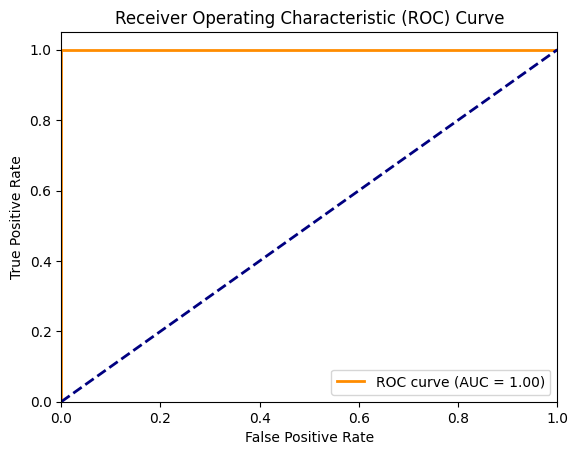

In [ ]:
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (AUC = %0.2f)' % auc_score)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

KNN

In [ ]:
knn = KNeighborsClassifier(n_neighbors=20)

In [ ]:
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=20)

In [ ]:
ky_pred = knn.predict(X_test)

In [ ]:
confusion_matrix(y_test, ky_pred)

array([[39,  0],
       [ 3, 45]])

In [ ]:
knnaccuracy = accuracy_score(y_test, ky_pred)

In [ ]:
print('KNN Accuracy:', knnaccuracy)

KNN Accuracy: 0.9655172413793104


In [ ]:
print(classification_report(y_test, ky_pred))

              precision    recall  f1-score   support

           0       0.93      1.00      0.96        39
           1       1.00      0.94      0.97        48

    accuracy                           0.97        87
   macro avg       0.96      0.97      0.97        87
weighted avg       0.97      0.97      0.97        87



In [ ]:
y_prob = knn.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
auc_score = auc(fpr, tpr)

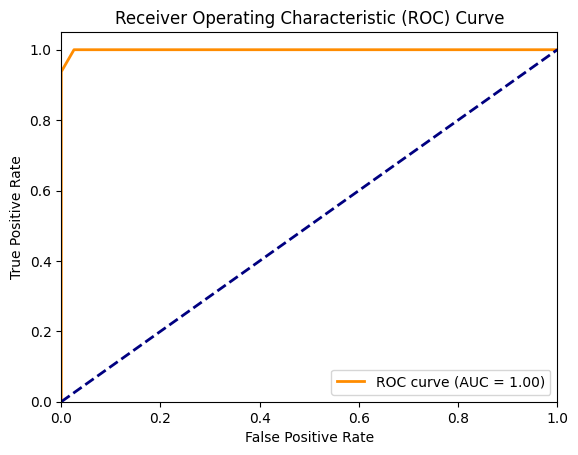

In [ ]:
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (AUC = %0.2f)' % auc_score)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

RANDOM FOREST

In [ ]:
rd_model = RandomForestClassifier(n_estimators=5)

In [ ]:
rd_model.fit(X_train, y_train)

RandomForestClassifier(n_estimators=5)

In [ ]:
rypred = rd_model.predict(X_test)

In [ ]:
confusion_matrix(y_test, rypred)

array([[38,  1],
       [ 2, 46]])

In [ ]:
rdf_accuracy = accuracy_score(y_test, rypred)

In [ ]:
print("Random Forest Accuracy:", rdf_accuracy)

Random Forest Accuracy: 0.9655172413793104


In [ ]:
print(classification_report(y_test, rypred))

              precision    recall  f1-score   support

           0       0.95      0.97      0.96        39
           1       0.98      0.96      0.97        48

    accuracy                           0.97        87
   macro avg       0.96      0.97      0.97        87
weighted avg       0.97      0.97      0.97        87



In [ ]:
y_prob = rd_model.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
auc_score = auc(fpr, tpr)

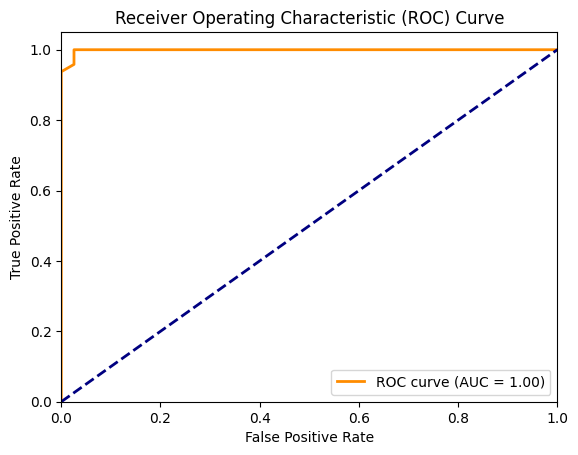

In [ ]:
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (AUC = %0.2f)' % auc_score)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

SVM

In [ ]:
'''A kernel function is used to transform the input data into a higher-dimensional feature space
 In this case, we chose the linear kernel because we have a large number of features and a
linear decision boundary may be appropriate for this dataset. However, other kernels may be
more suitable for other datasets or problems. '''

svm_clf = svm.SVC(kernel='linear')

In [ ]:
#The ravel() method is used to convert the target array into a 1-dimensional array.

svm_clf.fit(X_train, y_train.values.ravel())

SVC(kernel='linear')

In [ ]:
sy_pred = svm_clf.predict(X_test)

In [ ]:
confusion_matrix(y_test, sy_pred)

array([[39,  0],
       [ 0, 48]])

In [ ]:
svmaccuracy = accuracy_score(y_test, sy_pred)

In [ ]:
print("SVM Accuracy:", svmaccuracy)

SVM Accuracy: 1.0


In [ ]:
print(classification_report(y_test,sy_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        39
           1       1.00      1.00      1.00        48

    accuracy                           1.00        87
   macro avg       1.00      1.00      1.00        87
weighted avg       1.00      1.00      1.00        87



Desicion Tree

In [ ]:
dtc = DecisionTreeClassifier(max_depth = 8)

In [ ]:
dtc.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=8)

In [ ]:
dy_pred = dtc.predict(X_test)

In [ ]:
confusion_matrix(y_test, dy_pred)

array([[38,  1],
       [ 2, 46]])

In [ ]:
dtaccuracy = accuracy_score(y_test, dy_pred)

In [ ]:
print("Decision Tree Accuracy:", dtaccuracy)

Decision Tree Accuracy: 0.9655172413793104


In [ ]:
print(classification_report(y_test, dy_pred))

              precision    recall  f1-score   support

           0       0.95      0.97      0.96        39
           1       0.98      0.96      0.97        48

    accuracy                           0.97        87
   macro avg       0.96      0.97      0.97        87
weighted avg       0.97      0.97      0.97        87



In [ ]:
from sklearn import tree
from sklearn.tree import export_graphviz
import graphviz

[Text(0.4041666666666667, 0.9285714285714286, 'x[1] <= 20.5\ngini = 0.496\nsamples = 345\nvalue = [188, 157]'),
 Text(0.16666666666666666, 0.7857142857142857, 'x[0] <= 15.5\ngini = 0.265\nsamples = 102\nvalue = [16, 86]'),
 Text(0.13333333333333333, 0.6428571428571429, 'x[1] <= 6.0\ngini = 0.444\nsamples = 24\nvalue = [16, 8]'),
 Text(0.06666666666666667, 0.5, 'x[0] <= 4.5\ngini = 0.219\nsamples = 8\nvalue = [1, 7]'),
 Text(0.03333333333333333, 0.35714285714285715, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.1, 0.35714285714285715, 'gini = 0.0\nsamples = 7\nvalue = [0, 7]'),
 Text(0.2, 0.5, 'x[0] <= 9.5\ngini = 0.117\nsamples = 16\nvalue = [15, 1]'),
 Text(0.16666666666666666, 0.35714285714285715, 'gini = 0.0\nsamples = 12\nvalue = [12, 0]'),
 Text(0.23333333333333334, 0.35714285714285715, 'x[1] <= 12.0\ngini = 0.375\nsamples = 4\nvalue = [3, 1]'),
 Text(0.2, 0.21428571428571427, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.26666666666666666, 0.21428571428571427, 'gini =

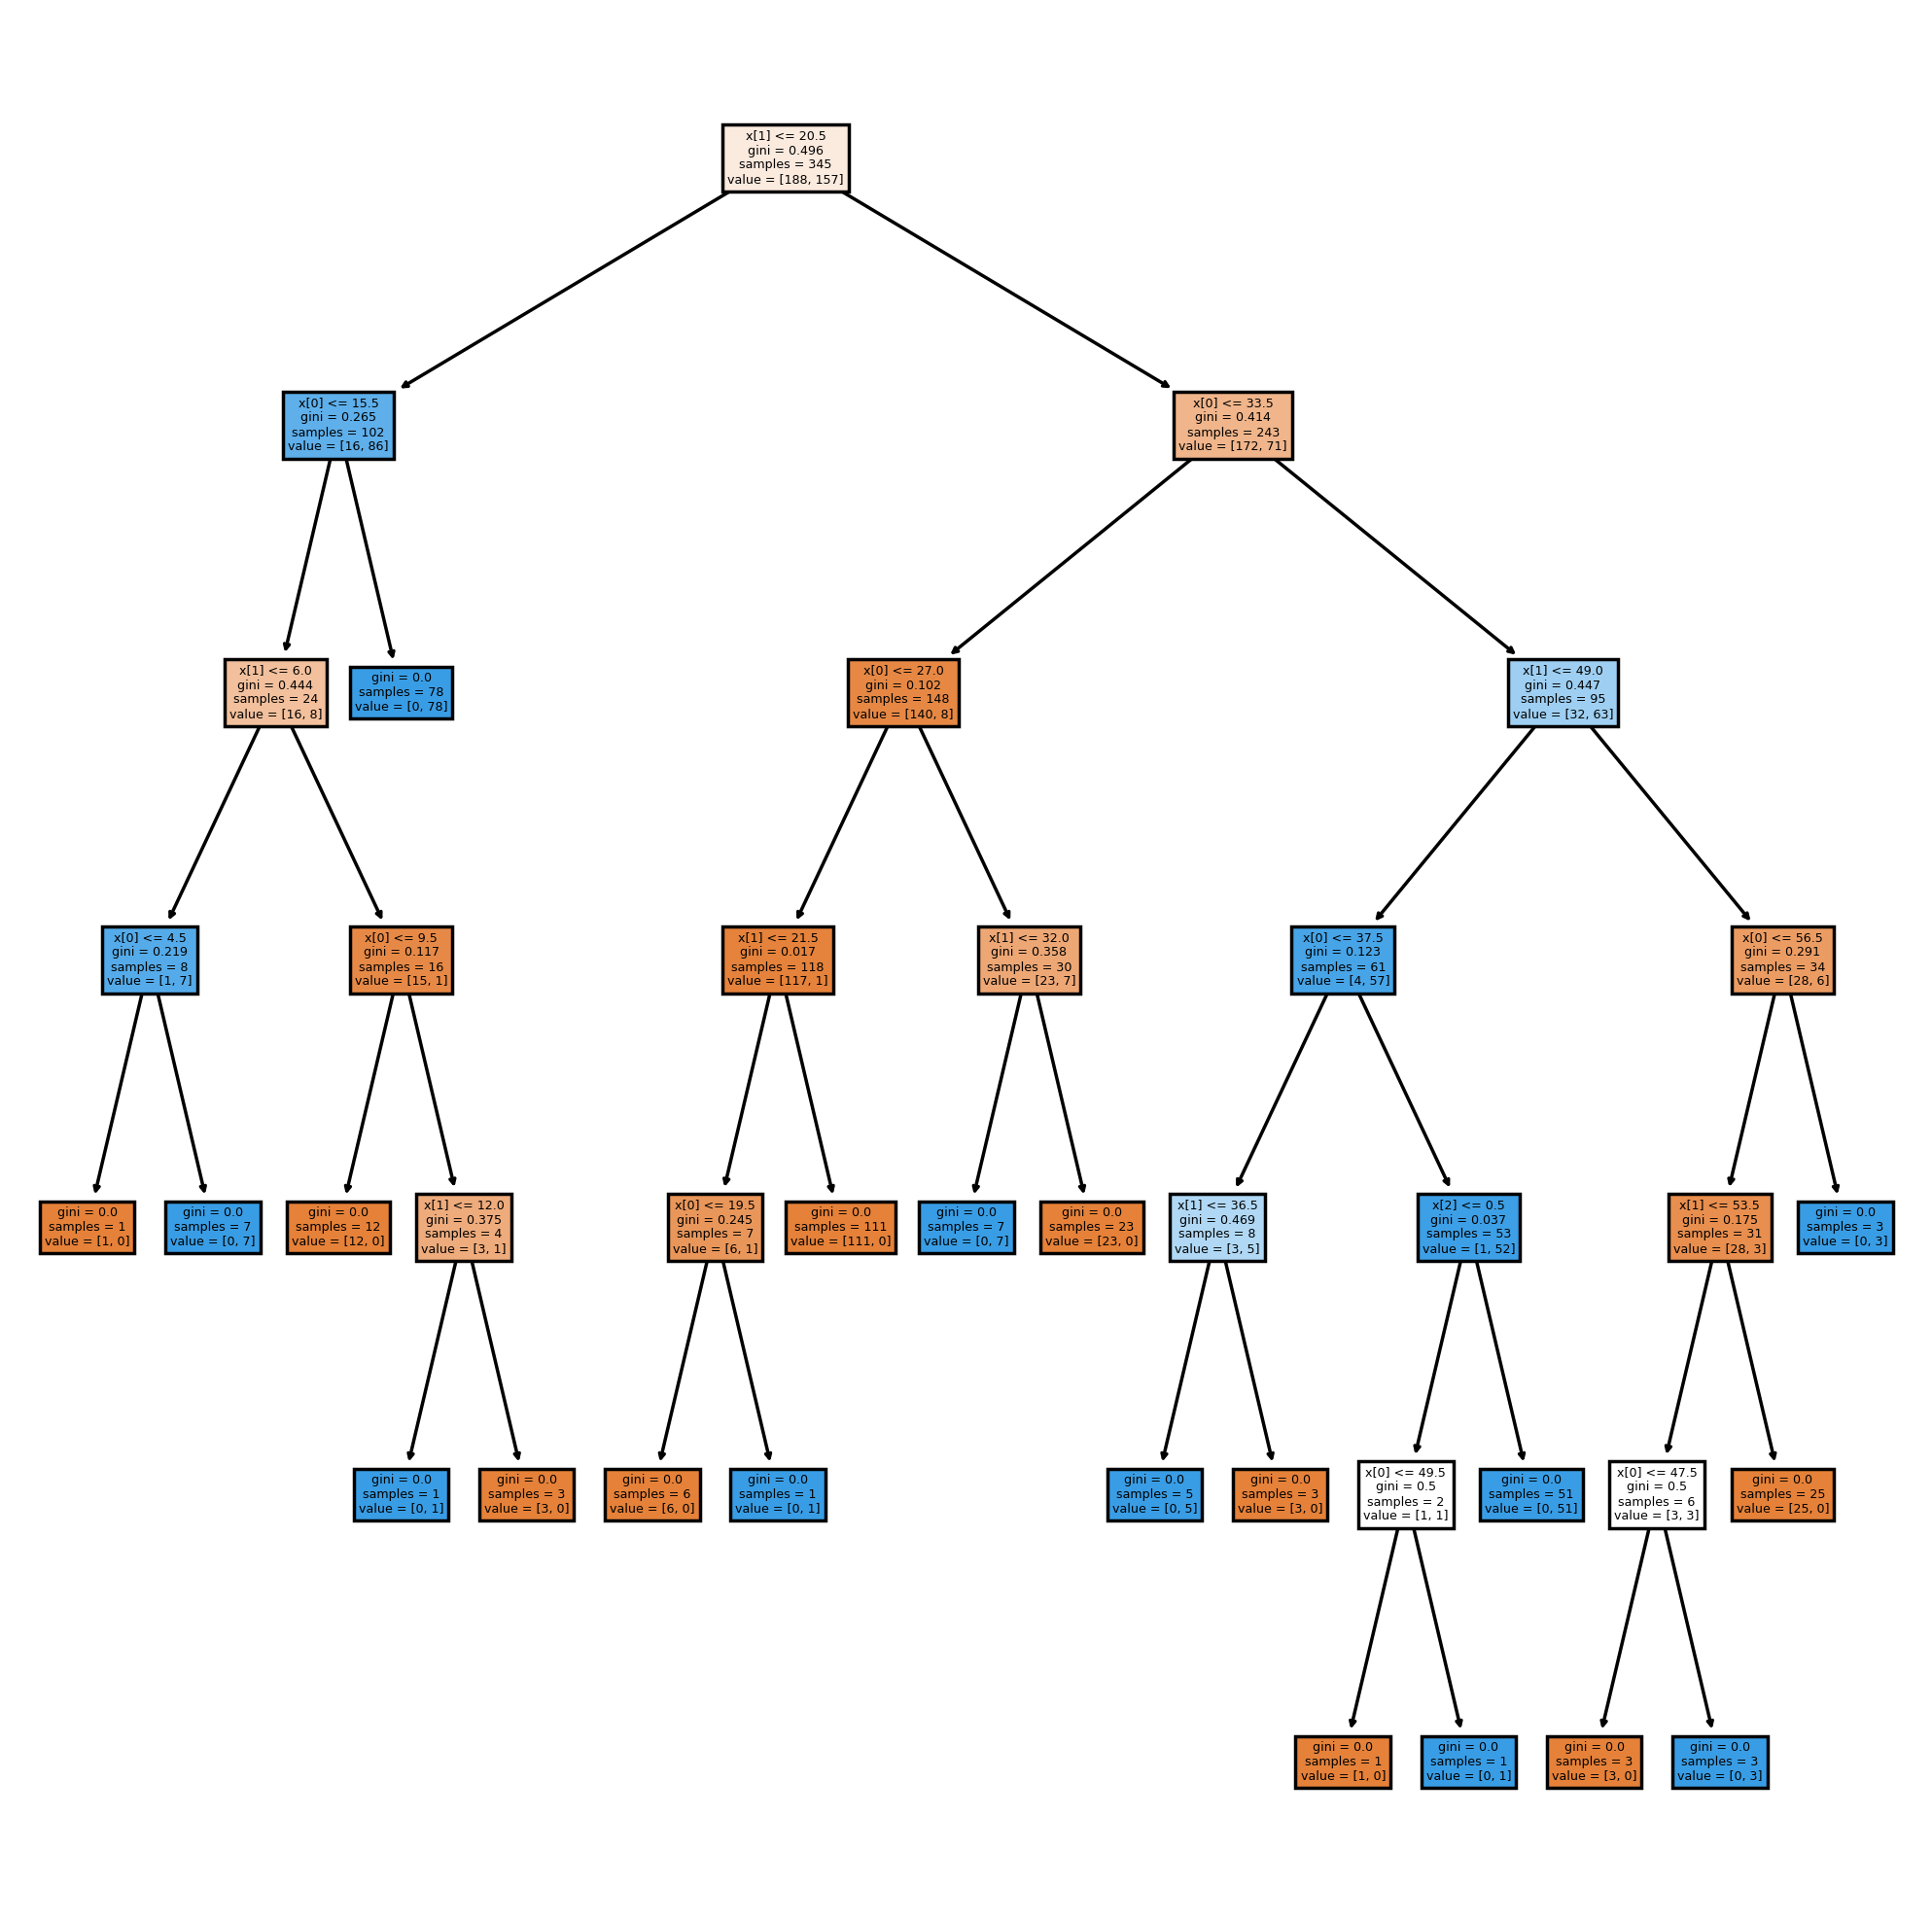

In [ ]:
#tree.plot_tree(dtree);
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (10,10), dpi=250)
tree.plot_tree(dtc, filled = True)

In [ ]:
import joblib

In [ ]:
joblib.dump(dtc, 'fifa_model.joblib')

['fifa_model.joblib']

In [ ]:
!pip install gradio

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 20.0/20.0 MB 34.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 65.8/65.8 kB 7.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 297.4/297.4 kB 26.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.4/75.4 kB 8.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 268.8/268.8 kB 22.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.5/50.5 kB 5.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 140.3/140.3 kB 11.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.7/45.7 kB 4.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 59.5/59.5 kB 5.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.9/129.9 kB 14.3 MB/s eta 0:00:00
INFO: pip is looking at multiple versions of mdit-py-plugins to determine which version is compatible with other requirements. This could take a while.
  

In [ ]:
import gradio as gr
import numpy as np
import joblib
from gradio.components import *
from sklearn.preprocessing import LabelEncoder

model = joblib.load('fifa_model.joblib')

options = ['Germany', 'Spain', 'Colombia', 'Italy', 'USA', 'Belgium', 'Cameroon', 'Norway', 'Brazil', 'Netherlands', 'Argentina', 'Nigeria', 'Romania', 'Korea Republic',
 'Mexico', 'Sweden', 'Saudi Arabia', 'Bulgaria', 'Switzerland', 'Bolivia', 'Republic of Ireland', 'Russia', 'Morocco', 'Greece', 'France', 'Paraguay', 'Jamaica',
 'England', 'Scotland', 'Chile', 'South Africa', 'Japan', 'Uruguay', 'Croatia', 'China PR', 'Denmark', 'Costa Rica', 'Portugal', 'Tunisia', 'Senegal', 'Slovenia',
 'Ecuador', 'Turkey', 'Poland', 'Trinidad and Tobago', 'Angola', 'Serbia', 'Australia', 'Czech Republic', 'Togo', 'IR Iran', "Côte d'Ivoire", 'Ghana', 'Ukraine',
 'Algeria', 'New Zealand', 'Honduras', 'Slovakia', 'Korea DPR', 'Bosnia and Herzegovina', 'Egypt', 'Peru', 'Iceland', 'Panama', 'Canada']
options2 = ['False', 'True']

encoder = LabelEncoder()
encoder.fit(options)
en = LabelEncoder()
en.fit(options2)

# Define a function to make predictions using the model
def predict(team1, team2, neutral):
    input_data = np.array([encoder.transform([team1])[0], encoder.transform([team2])[0], en.transform([neutral])[0]]).reshape(1, -1)
    pred = model.predict(input_data)
    if pred == 1:
      res = team1
    elif pred == 0:
      res = team2
    else:
      res = 'Draw'
    return res
# Create the input interface
team1_input = Dropdown(choices=options, label="Select Team 1")
team2_input = Dropdown(choices=options, label="Select Team 2")
neutral = Dropdown(choices=options2, label="Neutral Location or not")


inputs = [team1_input, team2_input, neutral]

# Create the output interface
outputs = gr.outputs.Textbox()

# Create the interface and launch
iface = gr.Interface(fn=predict, inputs=inputs, outputs=outputs)
iface.launch(debug=True)

<ipython-input-77-dab78ade89f4>:41: GradioDeprecationWarning: Usage of gradio.outputs is deprecated, and will not be supported in the future, please import your components from gradio.components
  outputs = gr.outputs.Textbox()


Colab notebook detected. This cell will run indefinitely so that you can see errors and logs. To turn off, set debug=False in launch().
Note: opening Chrome Inspector may crash demo inside Colab notebooks.

To create a public link, set `share=True` in `launch()`.


<IPython.core.display.Javascript object>

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


Keyboard interruption in main thread... closing server.
